<a href="https://colab.research.google.com/github/obaid5172007/My-repository/blob/main/Electrical_energy_output_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:
tf.__version__

'2.19.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [6]:
dataset = pd.read_excel('Folds5x2_pp.xlsx')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Visualizing features of dataset

In [7]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [8]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [9]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


### Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [11]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [12]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the second hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding the output layer

In [14]:
ann.add(tf.keras.layers.Dense(units = 1))

## Part 3 - Training the ANN

### Compiling the ANN

In [16]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the ANN model on the Training set

In [17]:
ann.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 20433.6309
Epoch 2/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 229.2393
Epoch 3/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 219.1725
Epoch 4/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 208.7110
Epoch 5/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 193.4263
Epoch 6/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 173.1477
Epoch 7/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 159.6522
Epoch 8/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 141.7984
Epoch 9/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 128.9907
Epoch 10/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 115.4029
Epoch 11/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 99.5472
Epoch 12/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 89.7912
Epoch 13/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79.8197
Epoch 14/50
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 69.7377
Epoch 15/50
240/240 ━━━━━━━━━━━

### Predicting the results of the Test set

In [18]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
[[430.55 431.23]
 [461.7  460.01]
 [465.27 461.14]
 ...
 [472.33 473.26]
 [439.48 438.  ]
 [458.52 463.28]]


# Visualization using plot

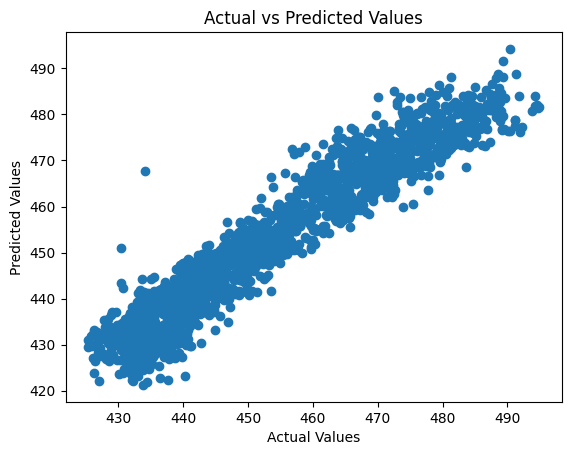

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()